# SVM IMPLEMENTATION
### My implementation and standard scikit-learn library

Planned workflow:

    1. Import libraries and data, Check Correlation of data , Standarize, Split,
    2. Code my implementation in 'my_svm_model.py', Use it, Check accuracy
    3. Use SVM library, check accuracy
    4. Compare two methods

In [82]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from my_svm import my_svm
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [83]:
# Generating Dataset, Splitting

X, y = datasets.make_blobs(
            n_samples = 800,
            n_features=2,
            cluster_std=1,
            centers=2,
            random_state=123
)

y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123)
X_train_1 = X_train[:,0]
X_train_2 = X_train[:,1]

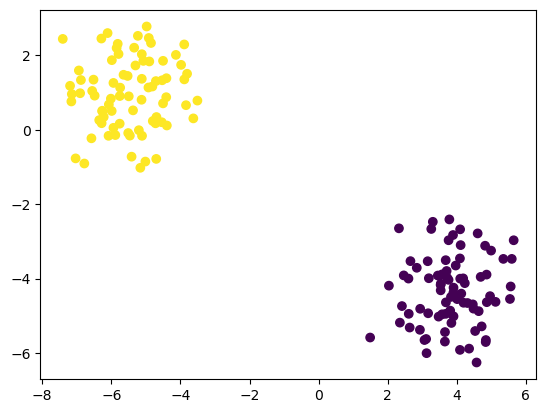

In [84]:
# Visualization
#y_train = np.vectorize()
plt.scatter(X_train_1, X_train_2, c=y_train)


### Using my implementation of SVM

Initialzing Model

In [85]:
model_1 = my_svm()

# Model training process
print(model_1.fit(X_train, y_train, 1.0, 100, 0.1))

Loss for 0th batch: 3684.0819561293897, Current w: [-74.21  43.15], Current b: -0.4
Loss for 10th batch: 447.8983594636916, Current w: [-25.87  15.04], Current b: -0.4
Loss for 20th batch: 54.45398414019987, Current w: [-9.02  5.25], Current b: -0.4
Loss for 30th batch: 6.620333220893415, Current w: [-3.15  1.83], Current b: -0.4
Loss for 40th batch: 0.8048779652710296, Current w: [-1.1   0.64], Current b: -0.4
Loss for 50th batch: 0.09785437037131621, Current w: [-0.38  0.22], Current b: -0.4
Loss for 60th batch: 0.1492653717127546, Current w: [-0.48  0.25], Current b: -0.4
Loss for 70th batch: 0.5994318112027355, Current w: [-0.34  0.28], Current b: -0.5
Loss for 80th batch: 0.776361766161983, Current w: [-0.31  0.11], Current b: -0.4
Loss for 90th batch: 0.1521696480227109, Current w: [-0.52  0.17], Current b: -0.4
Loss for 100th batch: 0.54286416690258, Current w: [-0.57  0.87], Current b: -0.7
None


Visualization of Loss


Text(0.5, 1.0, 'Loss decline while training')

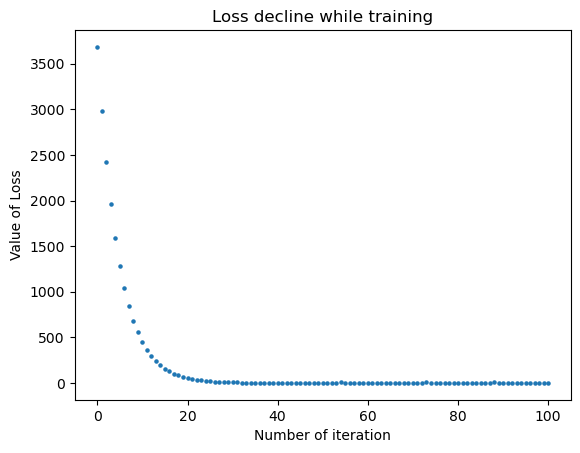

In [86]:
array_of_loss = model_1.loss_array
array_of_loss

batch = array_of_loss.keys()
loss_value = array_of_loss.values()

plt.scatter(batch, loss_value, s=5)
plt.xlabel('Number of iteration')
plt.ylabel('Value of Loss')
plt.title('Loss decline while training')


Predicting and checking accuracy to orginal outputs

In [87]:
# Predicting 
prediction = model_1.predict(X_test)
print(f'Example prediction: {prediction[:5]}')
print(f'Accuracy: {accuracy_score(prediction, y_test)}')

Example prediction: [-1.  1.  1.  1. -1.]
Accuracy: 1.0


### Visualization of Hyperlane

In [88]:
# Visualization
#y_train = np.vectorize()

def finding_x_2(w, x, b):
    x_2 = ((- w[0] * x[:,0]) / w[1]) - (b / w[1])
    return x_2

w = model_1.w
b = model_1.b
margin = 2 / w

x_1_min = np.amin(X_train[:,0])
x_1_max = np.amax(X_train[:,0])

x_2_min = np.amin(X_train[:,1])
x_2_max = np.amax(X_train[:,1])

x_0_2 = finding_x_2(w, X_train, b)



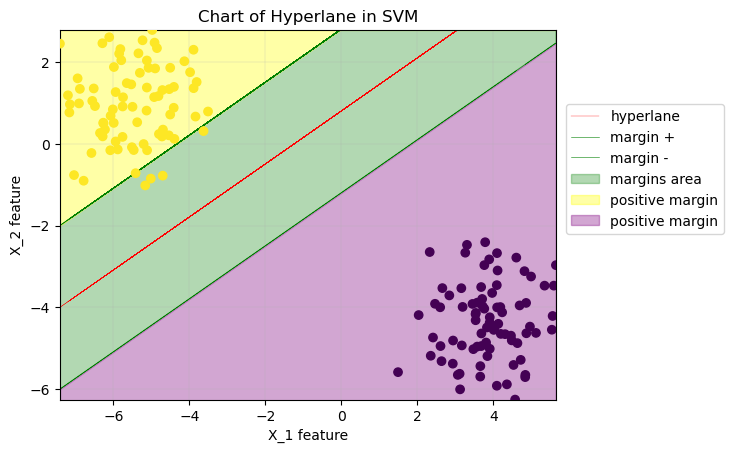

In [99]:
fig, ax = plt.subplots()

# grid i scatter
ax.grid(linewidth=0.2, alpha=0.9, zorder=0)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, zorder=3)

# hyperlane i margin
hyperlane = ax.plot(X_train[:,0], x_0_2,        color='red',   linewidth=0.25, label='hyperlane')
margin_positive = ax.plot(X_train[:,0], x_0_2 + 2,    color='green', linewidth=0.4,  label='margin +')
margin_negative = ax.plot(X_train[:,0], x_0_2 - 2,    color='green', linewidth=0.4,  label='margin -')

# sortowanie po X, żeby fill_between działało poprawnie
idx = np.argsort(X_train[:,0])
x_sorted = X_train[idx,0]
upper = x_0_2[idx] + 2
lower = x_0_2[idx] - 2

# zacieniowanie obszaru między marginami
ax.fill_between(x_sorted, lower, upper,
                color='green', alpha=0.3, label='margins area')

# Area of positive class
ax.fill_between(x_sorted, upper, x_2_max, color='yellow', alpha=0.35, label='positive margin')

ax.fill_between(x_sorted, x_1_min, lower, color='purple', alpha=0.35, label='positive margin')

# legenda i limity
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 0.8), borderaxespad=0)
ax.set_xlim(np.amin(X_train[:,0]), np.amax(X_train[:,0]))
ax.set_ylim(np.amin(X_train[:,1]), np.amax(X_train[:,1]))

plt.xlabel('X_1 feature')
plt.ylabel('X_2 feature')
plt.title('Chart of Hyperlane in SVM')

plt.show()